In [15]:
# to show an image automatically within the browser without using show()
%matplotlib inline 

import math
import numpy as np # for working with arrays
import pandas as pd # for working with tables
import scipy.stats as stats
import matplotlib.pyplot as plt # for visualization (creating plots)
import seaborn as sns # per visualizzare grafico correlazioni
import statistics as sts # statistic module for variance

In [2]:
# mettiamo il dataframe dentro la variabile df
df = pd.read_csv('Train_out_miss_formatoOK_CSV.csv', sep=';')

# Correzione errori semantici nel DF
 - TotalWorking Years ed Age

In [4]:
i = 0
for record in df['Age']:
    if record < (df.at[i, 'TotalWorkingYears'] + 18):
        df.at[i, 'TotalWorkingYears'] = record - 18
    i += 1

# ------------------------------------------------------------------------------------
i = 0
for record in df['YearsAtCompany']:
    if record > df.at[i, 'TotalWorkingYears'] and df.at[i, 'NumCompaniesWorked'] == 0:
        sostituzione = df.at[i, 'TotalWorkingYears']
        df.at[i, 'YearsAtCompany'] = sostituzione
    i += 1

i = 0
for record in df['YearsAtCompany']:
    if record > df.at[i, 'TotalWorkingYears'] and df.at[i, 'NumCompaniesWorked'] != 0:
        sostituzione = df.at[i, 'TotalWorkingYears']
        df.at[i, 'YearsAtCompany'] = sostituzione
        df.at[i, 'NumCompaniesWorked'] = 0
    i += 1
# ------------------------------------------------------------------------------------    
i = 0
for record in df['YearsWithCurrManager']:
    if record > df.at[i, 'YearsAtCompany']:
        sostituzione = df.at[i, 'YearsAtCompany']
        df.at[i, 'YearsWithCurrManager'] = sostituzione
    i += 1
    
i = 0
for record in df['YearsSinceLastPromotion']:
    if record > df.at[i, 'YearsAtCompany']:
        sostituzione = df.at[i, 'YearsAtCompany']
        df.at[i, 'YearsSinceLastPromotion'] = sostituzione
    i += 1
    
i = 0
for record in df['YearsInCurrentRole']:
    if record > df.at[i, 'YearsAtCompany']:
        sostituzione = df.at[i, 'YearsAtCompany']
        df.at[i, 'YearsInCurrentRole'] = sostituzione
    i += 1

In [11]:
# esportiamo il df per vedere se gli errori sono stati corretti
#df.to_csv('Train_prova_Mistakes1.csv', index=False) 

In [8]:
df['Gender'].value_counts()

Male      570
Female    390
ND         53
Name: Gender, dtype: int64

In [5]:
#metodo lorenzo
i =0
contand=0
for nd in df['Gender']:
    if nd == 'ND':
        contand+=1
        if contand < 32:
            nd = df.at[i,'Gender']='Male'
        elif contand >=32:
            nd = df.at[i,'Gender']='Female'
    i+=1
    

In [6]:
df['Gender'].value_counts()


Male      601
Female    412
Name: Gender, dtype: int64

In [ ]:
#per eliminare colonne usare .drop
#

In [7]:
# 0 uomini
# 1 donne
i = 0
for record in df['Gender']:
    if record == "Male":
            df.at[i, 'Gender'] = "0"
    elif record == "Female":
            df.at[i, 'Gender'] = "1"
    i += 1

df['Gender']


0       1
1       0
2       0
3       0
4       1
       ..
1008    0
1009    0
1010    0
1011    1
1012    1
Name: Gender, Length: 1013, dtype: object

In [8]:
# 0 no
# 1 yes
i = 0
for record in df['Attrition']:
    if record == "No":
            df.at[i, 'Attrition'] = "0"
    elif record == "Yes":
            df.at[i, 'Attrition'] = "1"
    i += 1

df['Attrition']


0       0
1       0
2       1
3       0
4       0
       ..
1008    0
1009    1
1010    1
1011    1
1012    1
Name: Attrition, Length: 1013, dtype: object

In [21]:
#df.to_csv('4_Train_Binarizzazione.csv', index=False)

In [42]:
correlation= df.corr()

<AxesSubplot:>

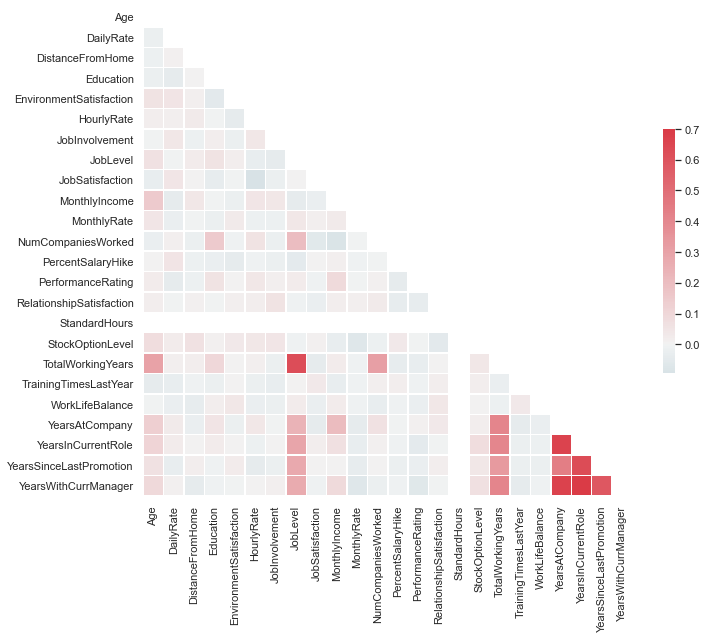

In [43]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
#trasformiamo attrition e gender in int poichè sono ogg
df['Attrition'] = df['Attrition'].astype('int32')

In [10]:
df['Gender'] = df['Gender'].astype('int32')

In [11]:

# Stagnation
array_stagnation = []
i = 0
for record in df['YearsSinceLastPromotion']:
    stagnation = record * df.at[i, 'YearsInCurrentRole']
    array_stagnation.append(stagnation)
    i += 1
    
mdf_df = df.assign(Stagnation = array_stagnation)


In [12]:
md = mdf_df.drop(columns =['DailyRate', 'MonthlyRate', 'HourlyRate','Over18', 'StandardHours', 'PerformanceRating','YearsSinceLastPromotion','YearsInCurrentRole'])

In [13]:
md.head()

Age  Attrition BusinessTravel              Department  DistanceFromHome  \
0   37          0  Travel_Rarely  Research & Development                 4   
1   36          0  Travel_Rarely  Research & Development                 5   
2   36          1  Travel_Rarely  Research & Development                11   
3   24          0  Travel_Rarely  Research & Development                11   
4   58          0  Travel_Rarely  Research & Development                 1   

   Education    EducationField  EnvironmentSatisfaction  Gender  \
0          3           Medical                        4       1   
1          3  Technical Degree                        3       0   
2          2           Medical                        1       0   
3          2           Medical                        3       0   
4          4           Medical                        1       1   

   JobInvolvement  ...  OverTime PercentSalaryHike  RelationshipSatisfaction  \
0               3  ...        No                12                         4   
1               2  ...       Yes                13                         4   
2               1  ...        No                15                         1   
3               3  ...       Yes                12                         4   
4               2  ...        No                20                         3   

  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                0                 10                      3               2   
1                1                 18                      2               3   
2                0                 15                      2               1   
3                0                  6                      3               2   
4                0                 23                      3               2   

   YearsAtCompany  YearsWithCurrManager  Stagnation  
0               5                     3           4  
1               4                     4           0  
2               6                     0           0  
3               6                     1           0  
4               6                     6          36  

[5 rows x 26 columns]

In [15]:
md.to_csv('5_Train_Elimination.csv', index=False)

In [16]:
correlation= md.corr()

<AxesSubplot:>

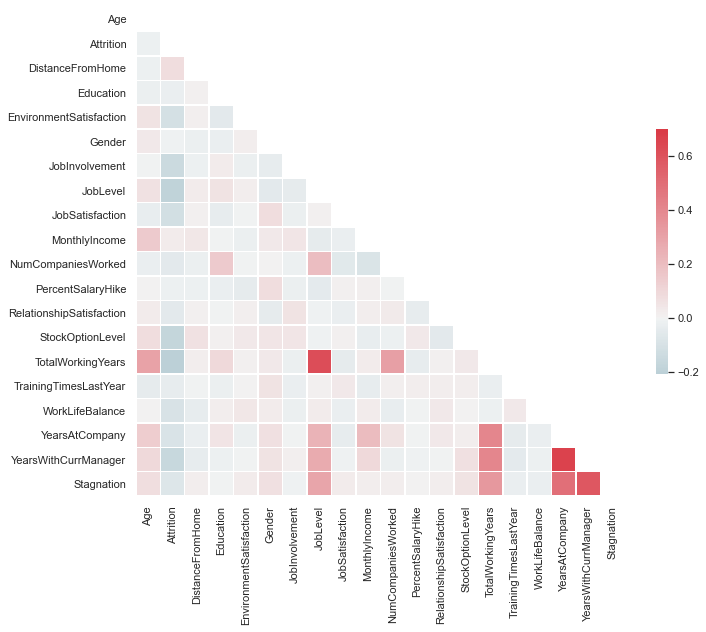

In [17]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [9]:
df = pd.read_csv('5_Train_Elimination.csv', sep=',')

In [10]:
df.head()

Age  Attrition BusinessTravel              Department  DistanceFromHome  \
0   37          0  Travel_Rarely  Research & Development                 4   
1   36          0  Travel_Rarely  Research & Development                 5   
2   36          1  Travel_Rarely  Research & Development                11   
3   24          0  Travel_Rarely  Research & Development                11   
4   58          0  Travel_Rarely  Research & Development                 1   

   Education    EducationField  EnvironmentSatisfaction  Gender  \
0          3           Medical                        4       1   
1          3  Technical Degree                        3       0   
2          2           Medical                        1       0   
3          2           Medical                        3       0   
4          4           Medical                        1       1   

   JobInvolvement  ...  OverTime PercentSalaryHike  RelationshipSatisfaction  \
0               3  ...        No                12                         4   
1               2  ...       Yes                13                         4   
2               1  ...        No                15                         1   
3               3  ...       Yes                12                         4   
4               2  ...        No                20                         3   

  StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  \
0                0                 10                      3               2   
1                1                 18                      2               3   
2                0                 15                      2               1   
3                0                  6                      3               2   
4                0                 23                      3               2   

   YearsAtCompany  YearsWithCurrManager  Stagnation  
0               5                     3           4  
1               4                     4           0  
2               6                     0           0  
3               6                     1           0  
4               6                     6          36  

[5 rows x 26 columns]

In [11]:
# 0 no
# 1 yes
i = 0
for record in df['OverTime']:
    if record == "No":
            df.at[i, 'OverTime'] = "0"
    elif record == "Yes":
            df.at[i, 'OverTime'] = "1"
    i += 1

df['OverTime']

0       0
1       1
2       0
3       1
4       0
       ..
1008    0
1009    1
1010    0
1011    0
1012    0
Name: OverTime, Length: 1013, dtype: object

In [12]:
pd = df

In [13]:
pd.to_csv('6_Train_Elimination_completed.csv', index=False)

In [16]:
mc = pd.read_csv('6_Train_Elimination_completed.csv')

In [18]:
mcc = mc.drop(columns =['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus'])

In [20]:
mcc.to_csv('7_drop_categorical.csv', index=False)

In [23]:
correlation = mcc.corr()

<AxesSubplot:>

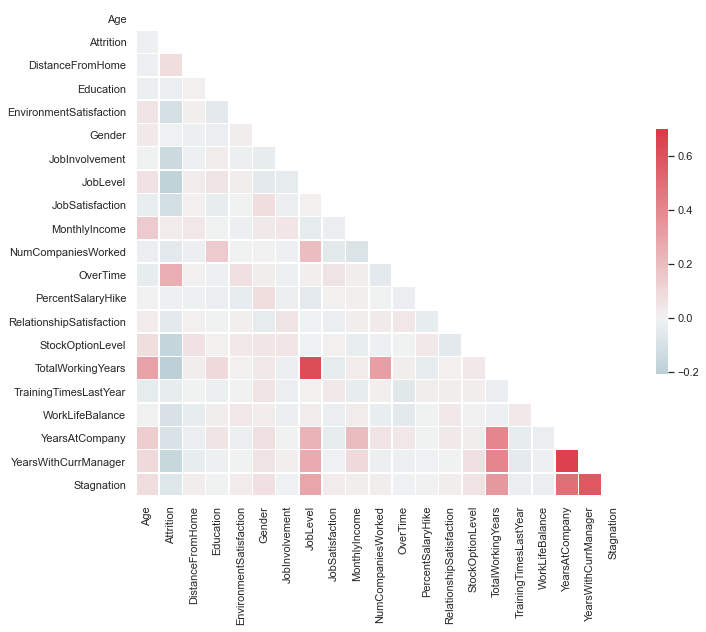

In [24]:
sns.set(style="white")

# Generate a mask for the upper triangle
mask = np.zeros_like(correlation, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation, mask=mask, cmap=cmap, vmax=.7, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

<AxesSubplot:>

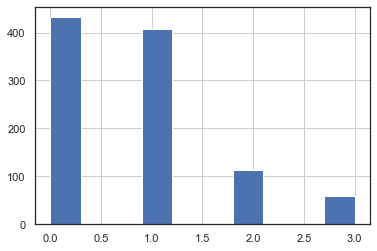

In [26]:
mcc['StockOptionLevel'].hist()

<AxesSubplot:>

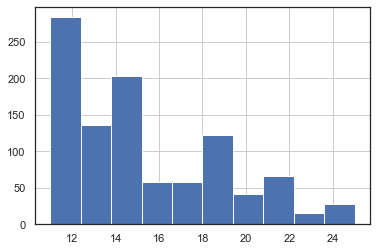

In [27]:
mcc['PercentSalaryHike'].hist()

In [28]:
nuovoDF = mcc.drop(columns = ['JobLevel'])

In [29]:
nuovoDF.head()

Age  Attrition  DistanceFromHome  Education  EnvironmentSatisfaction  \
0   37          0                 4          3                        4   
1   36          0                 5          3                        3   
2   36          1                11          2                        1   
3   24          0                11          2                        3   
4   58          0                 1          4                        1   

   Gender  JobInvolvement  JobSatisfaction  MonthlyIncome  NumCompaniesWorked  \
0       1               3                2           3452                   9   
1       0               2                2           9610                   2   
2       0               1                2           4678                   5   
3       0               3                1           2725                   1   
4       1               2                1          10552                   3   

   OverTime  PercentSalaryHike  RelationshipSatisfaction  StockOptionLevel  \
0         0                 12                         4                 0   
1         1                 13                         4                 1   
2         0                 15                         1                 0   
3         1                 12                         4                 0   
4         0                 20                         3                 0   

   TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  YearsAtCompany  \
0                 10                      3                2               5   
1                 18                      2                3               4   
2                 15                      2                1               6   
3                  6                      3                2               6   
4                 23                      3                2               6   

   YearsWithCurrManager  Stagnation  
0                     3           4  
1                     4           0  
2                     0           0  
3                     1           0  
4                     6          36

In [30]:
nuovoDF.to_csv('8_drop_categorical.csv', index=False)